In [1]:
text='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

In [24]:
import spacy

# extend "blank" pipeline with extra 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [41]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [9]:
nlp = spacy.blank('en')

doc = nlp(text)

'\nLook for data to help you address the question. Governments are good\nsources because data from public research is often freely available. Good\nplaces to start include http://www.data.gov/, and http://www.science.\ngov/, and in the United Kingdom, http://data.gov.uk/.\nTwo of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, \nand the European Social Survey at http://www.europeansocialsurvey.org/.\n'

In [13]:
for sentance in doc:
    if sentance.like_url:
        print(sentance)

http://www.data.gov/
http://www.science
http://data.gov.uk/.
http://www3.norc.org/gss+website/
http://www.europeansocialsurvey.org/.


In [14]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"

doc = nlp(transactions)

In [19]:
for word in doc:
    if word.like_num and doc[word.i+1].is_currency:
        print(word.text, doc[word.i+1].text)

two $
500 €


In [25]:
doc = nlp(text)

for token in doc:
    print(token, "|", token.pos_, "|", token.lemma_)


 | SPACE | 

Look | VERB | look
for | ADP | for
data | NOUN | datum
to | PART | to
help | VERB | help
you | PRON | you
address | VERB | address
the | DET | the
question | NOUN | question
. | PUNCT | .
Governments | NOUN | government
are | AUX | be
good | ADJ | good

 | SPACE | 

sources | NOUN | source
because | SCONJ | because
data | NOUN | datum
from | ADP | from
public | ADJ | public
research | NOUN | research
is | AUX | be
often | ADV | often
freely | ADV | freely
available | ADJ | available
. | PUNCT | .
Good | ADJ | good

 | SPACE | 

places | NOUN | place
to | PART | to
start | VERB | start
include | VERB | include
http://www.data.gov/ | INTJ | http://www.data.gov/
, | PUNCT | ,
and | CCONJ | and
http://www.science | PROPN | http://www.science
. | PUNCT | .

 | SPACE | 

gov/ | X | gov/
, | PUNCT | ,
and | CCONJ | and
in | ADP | in
the | DET | the
United | PROPN | United
Kingdom | PROPN | Kingdom
, | PUNCT | ,
http://data.gov.uk/. | PROPN | http://data.gov.uk/.

 | SPACE | 

Tw

In [27]:
for ent in doc.ents:
    print(ent, "|", ent.label_, "|", spacy.explain(ent.label_))

the United Kingdom | GPE | Countries, cities, states
Two | CARDINAL | Numerals that do not fall under another type
the General Social Survey | ORG | Companies, agencies, institutions, etc.
the European Social Survey | ORG | Companies, agencies, institutions, etc.


In [28]:
from spacy import displacy

displacy.render(doc, style="ent")

In [29]:
import nltk

In [30]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [36]:
sample = nltk.sent_tokenize(text)[1].split()

In [37]:
sample

['Governments',
 'are',
 'good',
 'sources',
 'because',
 'data',
 'from',
 'public',
 'research',
 'is',
 'often',
 'freely',
 'available.']

In [38]:
for word in sample:
    print(word, "|", stemmer.stem(word))

Governments | govern
are | are
good | good
sources | sourc
because | becaus
data | data
from | from
public | public
research | research
is | is
often | often
freely | freeli
available. | available.


In [40]:
nlp = spacy.load("en_core_web_sm")

doc = nlp(' '.join(sample))

for token in doc:
    print(token, "|", token.lemma_)

Governments | government
are | be
good | good
sources | source
because | because
data | datum
from | from
public | public
research | research
is | be
often | often
freely | freely
available | available
. | .


In [44]:
# create custom rule for lemmatization - replace "bro" and "brah" with "brother"
ar = nlp.get_pipe('attribute_ruler')
ar.add([[{"TEXT": "bro"}], [{"TEXT": "brah"}]], 
         {"LEMMA": "brother"})

In [45]:
doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted.")

for token in doc:
    print(token, token.lemma_, sep='|')

Bro|brother
,|,
you|you
wanna|wanna
go|go
?|?
Brah|brother
,|,
do|do
n't|not
say|say
no|no
!|!
I|I
am|be
exhausted|exhaust
.|.


In [46]:
doc = nlp("""Inflation rose again in April, continuing a climb that has pushed consumers to the brink and is threatening the economic expansion, the Bureau of Labor Statistics reported Wednesday.

The consumer price index, a broad-based measure of prices for goods and services, increased 8.3% from a year ago, higher than the Dow Jones estimate for an 8.1% gain. That represented a slight ease from March’s peak but was still close to the highest level since the summer of 1982.

Removing volatile food and energy prices, so-called core CPI still rose 6.2%, against expectations for a 6% gain, clouding hopes that inflation had peaked in March.

The month-over-month gains also were higher than expectations — 0.3% on headline CPI versus the 0.2% estimate and a 0.6% increase for core, against the outlook for a 0.4% gain.

The price gains also meant that workers continued to lose ground. Real wages adjusted for inflation decreased 0.1% on the month despite a nominal increase of 0.3% in average hourly earnings. Over the past year, real earnings have dropped 2.6% even though average hourly earnings are up 5.5%.

Inflation has been the single biggest threat to a recovery that began early in the Covid pandemic and saw the economy in 2021 stage its biggest single-year growth level since 1984. Rising prices at the pump and in grocery stores have been one problem, but inflation has spread beyond those two areas into housing, auto sales and a host of other areas.

Federal Reserve officials have responded to the problem with two interest rate hikes so far this year and pledges of more until inflation comes down to the central bank’s 2% goal. However, Wednesday’s data shows that the Fed has a big job ahead.

Credits: cnbc.com""")

In [54]:
for token in doc:
    #if token.pos_ == "NOUN":
        print(token," | ", token.pos_, " | ", spacy.explain(token.pos_), " | ", token.tag_, " | ", spacy.explain(token.tag_))

Inflation  |  NOUN  |  noun  |  NN  |  noun, singular or mass
rose  |  VERB  |  verb  |  VBD  |  verb, past tense
again  |  ADV  |  adverb  |  RB  |  adverb
in  |  ADP  |  adposition  |  IN  |  conjunction, subordinating or preposition
April  |  PROPN  |  proper noun  |  NNP  |  noun, proper singular
,  |  PUNCT  |  punctuation  |  ,  |  punctuation mark, comma
continuing  |  VERB  |  verb  |  VBG  |  verb, gerund or present participle
a  |  DET  |  determiner  |  DT  |  determiner
climb  |  NOUN  |  noun  |  NN  |  noun, singular or mass
that  |  PRON  |  pronoun  |  WDT  |  wh-determiner
has  |  AUX  |  auxiliary  |  VBZ  |  verb, 3rd person singular present
pushed  |  VERB  |  verb  |  VBN  |  verb, past participle
consumers  |  NOUN  |  noun  |  NNS  |  noun, plural
to  |  ADP  |  adposition  |  IN  |  conjunction, subordinating or preposition
the  |  DET  |  determiner  |  DT  |  determiner
brink  |  NOUN  |  noun  |  NN  |  noun, singular or mass
and  |  CCONJ  |  coordinating co

In [56]:
counts = doc.count_by(spacy.attrs.POS)
counts

{92: 96,
 100: 27,
 86: 15,
 85: 39,
 96: 16,
 97: 32,
 90: 34,
 95: 4,
 87: 13,
 89: 10,
 84: 23,
 103: 7,
 93: 19,
 94: 4,
 98: 8,
 101: 1}

In [57]:
doc.vocab[92].text

'NOUN'

In [58]:
for k, v in counts.items():
    print(doc.vocab[k].text, "|", v)

NOUN | 96
VERB | 27
ADV | 15
ADP | 39
PROPN | 16
PUNCT | 32
DET | 34
PRON | 4
AUX | 13
CCONJ | 10
ADJ | 23
SPACE | 7
NUM | 19
PART | 4
SCONJ | 8
X | 1


In [60]:
for ent in doc.ents:
    print(ent.text, ent.label_, spacy.explain(ent.label_), sep='|')

April|DATE|Absolute or relative dates or periods
the Bureau of Labor Statistics|ORG|Companies, agencies, institutions, etc.
Wednesday|DATE|Absolute or relative dates or periods
8.3%|PERCENT|Percentage, including "%"
a year ago|DATE|Absolute or relative dates or periods
Dow Jones|ORG|Companies, agencies, institutions, etc.
8.1%|PERCENT|Percentage, including "%"
March|DATE|Absolute or relative dates or periods
the summer of 1982|DATE|Absolute or relative dates or periods
6.2%|PERCENT|Percentage, including "%"
6%|PERCENT|Percentage, including "%"
March|DATE|Absolute or relative dates or periods
0.3%|PERCENT|Percentage, including "%"
0.2%|PERCENT|Percentage, including "%"
0.6%|PERCENT|Percentage, including "%"
0.4%|PERCENT|Percentage, including "%"
0.1%|PERCENT|Percentage, including "%"
the month|DATE|Absolute or relative dates or periods
0.3%|PERCENT|Percentage, including "%"
hourly|TIME|Times smaller than a day
the past year|DATE|Absolute or relative dates or periods
2.6%|PERCENT|Percent

In [61]:
displacy.render(doc)

In [62]:
displacy.render(doc, style="ent")

In [64]:
nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [65]:
from spacy.lang.en.stop_words import STOP_WORDS

STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [67]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
doc


Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.

In [68]:
for token in doc:
    if token.is_stop:
        print(token)

for
to
you
the
are
because
from
is
often
to
and
and
in
the
Two
of
my
are
the
at
and
the
at


In [69]:
def preprocess(text):
    doc = nlp(text)

    no_stop_words = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return no_stop_words

In [70]:
preprocess(text)

['\n',
 'Look',
 'data',
 'help',
 'address',
 'question',
 'Governments',
 'good',
 '\n',
 'sources',
 'data',
 'public',
 'research',
 'freely',
 'available',
 'Good',
 '\n',
 'places',
 'start',
 'include',
 'http://www.data.gov/',
 'http://www.science',
 '\n',
 'gov/',
 'United',
 'Kingdom',
 'http://data.gov.uk/.',
 '\n',
 'favorite',
 'data',
 'sets',
 'General',
 'Social',
 'Survey',
 'http://www3.norc.org/gss+website/',
 '\n',
 'European',
 'Social',
 'Survey',
 'http://www.europeansocialsurvey.org/.',
 '\n']

In [2]:
!pip install scikit-learn

  Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.3/10.6 MB 2.9 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/10.6 MB 3.7 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/10.6 MB 4.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/10.6 MB 5.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/10.6 MB 6.2 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/10.6 MB 7.0 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/10.6 MB 7.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/10.6 MB 8.3 MB/s eta 0:00:01
   ---------------- ----------------------- 4.4/10.6 MB 9.1 MB/s eta 0:00:01
   ----------------

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(ngram_range=(2,2)) # include n-grams from&to
v.fit(["That represented a slight ease from March’s peak but was still close to the highest level since the summer of 1982. Removing volatile food and energy prices, so-called core CPI still rose 6.2%, against expectations for a 6% gain, clouding hopes that inflation had peaked in March."])

CountVectorizer(ngram_range=(2, 2))

In [8]:
v.vocabulary_

{'that represented': 37,
 'represented slight': 28,
 'slight ease': 31,
 'ease from': 9,
 'from march': 14,
 'march peak': 22,
 'peak but': 24,
 'but was': 3,
 'was still': 42,
 'still close': 33,
 'close to': 5,
 'to the': 40,
 'the highest': 38,
 'highest level': 17,
 'level since': 21,
 'since the': 30,
 'the summer': 39,
 'summer of': 35,
 'of 1982': 23,
 '1982 removing': 0,
 'removing volatile': 27,
 'volatile food': 41,
 'food and': 12,
 'and energy': 2,
 'energy prices': 10,
 'prices so': 26,
 'so called': 32,
 'called core': 4,
 'core cpi': 7,
 'cpi still': 8,
 'still rose': 34,
 'rose against': 29,
 'against expectations': 1,
 'expectations for': 11,
 'for gain': 13,
 'gain clouding': 15,
 'clouding hopes': 6,
 'hopes that': 18,
 'that inflation': 36,
 'inflation had': 20,
 'had peaked': 16,
 'peaked in': 25,
 'in march': 19}

In [9]:
text = ['That represented a slight ease from March’s peak but was still close to the highest level since the summer of 1982.']

In [12]:
import spacy
nlp = spacy.load('en_core_web_sm')

def preprocess(text:str)->str:
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

preprocess(text[0])

'represent slight ease March peak close high level summer 1982'

In [14]:
doc = ["Inflation rose again in April, continuing a climb that has pushed consumers to the brink and is threatening the economic expansion, the Bureau of Labor Statistics reported Wednesday.",
    "The consumer price index, a broad-based measure of prices for goods and services, increased 8.3% from a year ago, higher than the Dow Jones estimate for an 8.1% gain. That represented a slight ease from March’s peak but was still close to the highest level since the summer of 1982.",
    "Removing volatile food and energy prices, so-called core CPI still rose 6.2%, against expectations for a 6% gain, clouding hopes that inflation had peaked in March.",
    "The month-over-month gains also were higher than expectations — 0.3% on headline CPI versus the 0.2% estimate and a 0.6% increase for core, against the outlook for a 0.4% gain.",
    "The price gains also meant that workers continued to lose ground. Real wages adjusted for inflation decreased 0.1% on the month despite a nominal increase of 0.3% in average hourly earnings. Over the past year, real earnings have dropped 2.6% even though average hourly earnings are up 5.5%.",
    "Inflation has been the single biggest threat to a recovery that began early in the Covid pandemic and saw the economy in 2021 stage its biggest single-year growth level since 1984. Rising prices at the pump and in grocery stores have been one problem, but inflation has spread beyond those two areas into housing, auto sales and a host of other areas.",
    "Federal Reserve officials have responded to the problem with two interest rate hikes so far this year and pledges of more until inflation comes down to the central bank’s 2% goal. However, Wednesday’s data shows that the Fed has a big job ahead.",
    ]

In [15]:
corpus_processed = [preprocess(text) for text in doc]
corpus_processed

['inflation rise April continue climb push consumer brink threaten economic expansion Bureau Labor Statistics report Wednesday',
 'consumer price index broad base measure price good service increase 8.3 year ago high Dow Jones estimate 8.1 gain represent slight ease March peak close high level summer 1982',
 'remove volatile food energy price call core CPI rise 6.2 expectation 6 gain cloud hope inflation peak March',
 'month month gain high expectation 0.3 headline CPI versus 0.2 estimate 0.6 increase core outlook 0.4 gain',
 'price gain mean worker continue lose ground real wage adjust inflation decrease 0.1 month despite nominal increase 0.3 average hourly earning past year real earning drop 2.6 average hourly earning 5.5',
 'inflation single big threat recovery begin early Covid pandemic see economy 2021 stage big single year growth level 1984 rise price pump grocery store problem inflation spread area housing auto sale host area',
 'Federal Reserve official respond problem interest

In [16]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'inflation': 136,
 'rise': 211,
 'april': 10,
 'continue': 49,
 'climb': 38,
 'push': 192,
 'consumer': 46,
 'brink': 28,
 'threaten': 240,
 'economic': 77,
 'expansion': 86,
 'bureau': 32,
 'labor': 149,
 'statistics': 232,
 'report': 203,
 'wednesday': 248,
 'inflation rise': 140,
 'rise april': 212,
 'april continue': 11,
 'continue climb': 50,
 'climb push': 39,
 'push consumer': 193,
 'consumer brink': 47,
 'brink threaten': 29,
 'threaten economic': 241,
 'economic expansion': 78,
 'expansion bureau': 87,
 'bureau labor': 33,
 'labor statistics': 150,
 'statistics report': 233,
 'report wednesday': 204,
 'price': 181,
 'index': 134,
 'broad': 30,
 'base': 20,
 'measure': 160,
 'good': 106,
 'service': 219,
 'increase': 130,
 'year': 252,
 'ago': 7,
 'high': 116,
 'dow': 66,
 'jones': 147,
 'estimate': 83,
 'gain': 99,
 'represent': 205,
 'slight': 226,
 'ease': 75,
 'march': 156,
 'peak': 176,
 'close': 40,
 'level': 151,
 'summer': 236,
 '1982': 0,
 'consumer price': 48,
 'pric

In [18]:
v.transform(["creation rise April continue climb push consumer"]).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ('multi_nb', MultinomialNB()),
])

clf.fit(x, y)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))


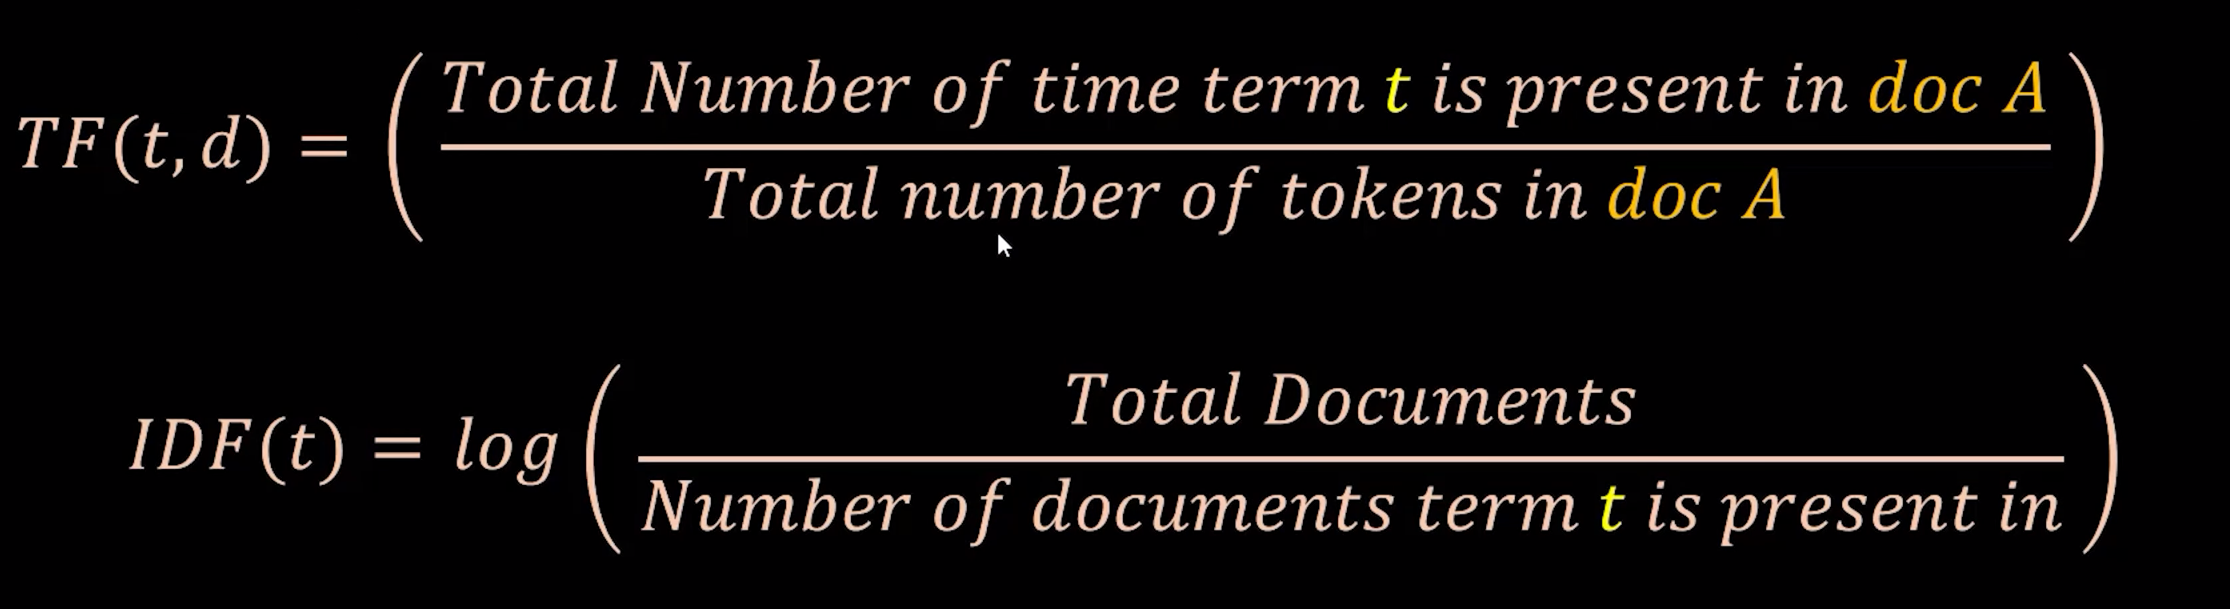](attachment:image-2.png)

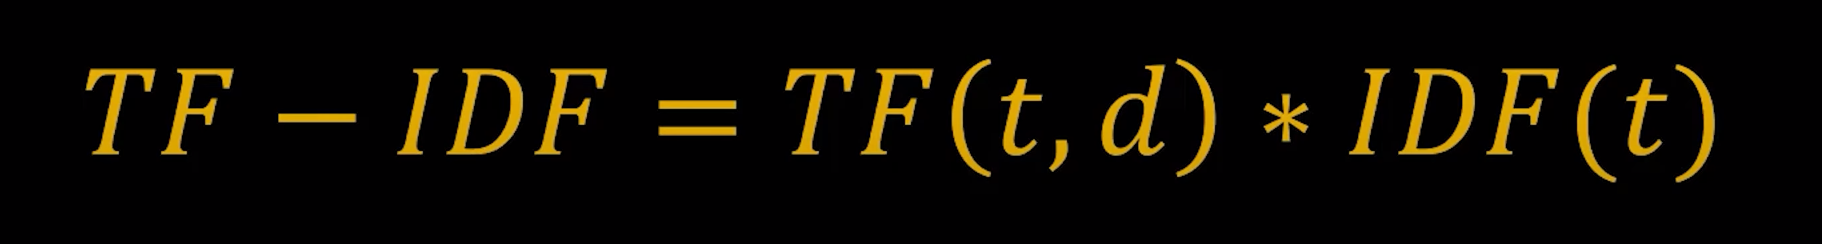

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()
transformed_output = v.fit_transform(doc)
print(v.vocabulary_)

{'inflation': 86, 'rose': 128, 'again': 4, 'in': 82, 'april': 11, 'continuing': 37, 'climb': 30, 'that': 144, 'has': 71, 'pushed': 118, 'consumers': 35, 'to': 151, 'the': 145, 'brink': 24, 'and': 10, 'is': 89, 'threatening': 150, 'economic': 50, 'expansion': 55, 'bureau': 26, 'of': 102, 'labor': 93, 'statistics': 139, 'reported': 123, 'wednesday': 159, 'consumer': 34, 'price': 114, 'index': 85, 'broad': 25, 'based': 18, 'measure': 98, 'prices': 115, 'for': 61, 'goods': 66, 'services': 131, 'increased': 84, 'from': 62, 'year': 163, 'ago': 6, 'higher': 74, 'than': 143, 'dow': 44, 'jones': 92, 'estimate': 53, 'an': 9, 'gain': 63, 'represented': 124, 'slight': 135, 'ease': 49, 'march': 96, 'peak': 111, 'but': 27, 'was': 158, 'still': 140, 'close': 31, 'highest': 75, 'level': 94, 'since': 133, 'summer': 142, '1982': 0, 'removing': 122, 'volatile': 156, 'food': 60, 'energy': 52, 'so': 136, 'called': 28, 'core': 38, 'cpi': 40, 'against': 5, 'expectations': 56, 'clouding': 32, 'hopes': 77, 'ha

In [21]:
transformed_output.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.22023755,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10461667, 0.22023755, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.22023755,
       0.        , 0.22023755, 0.        , 0.        , 0.        ,
       0.22023755, 0.        , 0.        , 0.        , 0.        ,
       0.22023755, 0.        , 0.22023755, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.22023755, 0.        , 0.        , 0.        , 0.        ,
       0.22023755, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.15626513, 0.        , 0.        , 0.     

In [1]:
!python -m spacy download en_core_web_lg

     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     -------------------------------------- 0.0/587.7 MB 217.9 kB/s eta 0:44:58
     -------------------------------------- 0.0/587.7 MB 245.8 kB/s eta 0:39:52
     -------------------------------------- 0.1/587.7 MB 328.2 kB/s eta 0:29:51
     -------------------------------------- 0.2/587.7 MB 787.7 kB/s eta 0:12:26
     ---------------------------------------- 0.4/587.7 MB 1.2 MB/s eta 0:07:55
     ---------------------------------------- 0.6/587.7 MB 1.8 MB/s eta 0:05:25
     ---------------------------------------- 0.9/587.7 MB 2.5 MB/s eta 0:03:57
     ---------------------------------------- 1.4/587.7 MB 3.3 MB/s eta 0:02:58
     ---------------------------------------- 1.8/587.7 MB 4.0 MB/s eta 0:02:25
     ---------------------------------------- 2.0/587.7 MB 3.

In [2]:
import spacy
nlp = spacy.load('en_core_web_lg')  # large dataset with word vectors using GloVe embeding

In [3]:
doc = nlp("My name is Maksym")
for token in doc:
    print(token.text, " has vector: ", token.has_vector, " OOV: ", token.is_oov)

My  has vector:  True  OOV:  False
name  has vector:  True  OOV:  False
is  has vector:  True  OOV:  False
Maksym  has vector:  True  OOV:  False


In [6]:
doc[-1].vector.shape

(300,)

In [7]:
base_token = nlp("dinner")
doc = nlp("apple dinner bread plate dish wash")
for token in doc:
    print(f"{token.text} - {base_token.text}: {token.similarity(base_token)}")

apple - dinner: 0.26630759495605216
dinner - dinner: 0.9999999965970857
bread - dinner: 0.4130774308935946
plate - dinner: 0.23102138569374372
dish - dinner: 0.4962758456551533
wash - dinner: 0.18208327175516562


In [10]:
def print_simmilarity(word_base, word_to_compare):
    base_token = nlp(word_base)
    other_word = nlp(word_to_compare)
    for token in other_word:
        print(f"{base_token} - {token}: {token.similarity(base_token)}")

In [11]:
print_simmilarity('Apple', "Samsung")

Apple - Samsung: 0.6784731985389744
